In [2]:
import numpy as np

In [3]:
#Here is a function that we will later try to approximate by a polynomial
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
#Create test and training samples of the function
np.random.seed(0)

n_samples = 30

#this is a list of random real numbers
X = np.sort(np.random.rand(n_samples))

#this is the list of values of our function at these numbers, disturbed by some random noise
#(if we apply the function to a list, we get back a list of values,
# this we add to a list of disturbance values)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


In [5]:
#--------randomly splits your sample data into a training set and a test set-----------
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
#---- it doesn't matter how exactly this splitting is done; what matters is that now
# xtrain and ytrain are lists of numbers of the same length
#which you should use as training data.


In [7]:
#-----your task: -----------

# First approximate the given training set xtrain, ytrain by polynomials p_1, ..., p_30
# of degrees 1 to 30.
degrees = np.arange(1, 31)
# Polynomials in numpy can be realized as poly1d objects:
# https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

# It is up to you how you do it - either using a linear model as in part a), or a pseudoinverse as in part b)
# or by means of existing methods in Python e.g. numpy.polyfit():
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# or methods you find here:
# https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial

my_poly = []# <--- your list of polynomials here!
for degree in degrees:
    coefficients = np.polyfit(xtrain, ytrain, degree)
    poly = np.poly1d(coefficients)
    my_poly.append(poly)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

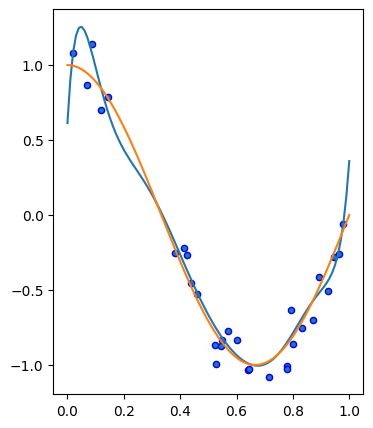

In [8]:
#Here you can watch your approximation (blue), the true function (orange)
#and the test points (blue circles)
import matplotlib.pyplot as plt
X_test = np.linspace(0, 1, 100)  # <-- set of points to plot, we go in 100 steps from 0 to 1
plt.figure(figsize=(4, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X_test, my_poly[8](X_test), label="Model") # <--- plotting the 9th polynomial in our list
plt.plot(X_test, true_fun(X_test), label="True function")
# this is just for having something to look at, and for you seeing how to plot.

In [9]:
#-----back to your task: -----------
# Calculate and print for each of the polynomials on your list the mean squared error on the training set
# and on the test set, i.e.
#the sum over all j of (p_i(xtrain[j])-ytrain[j])^2.
# You can do this either by hand or using sklearn.metrics.mean_squared_error,
#or if you used np.polyfit above, you can activate the option 'full' and obtain part of the the data right away (I think)
from sklearn.metrics import mean_squared_error

m_train = [mean_squared_error(ytrain, poly(xtrain)) for poly in my_poly] # <--- list of mean squared errors on the training set here (should be a list of numbers, going through all the polynomials)
#Also calculate and print the mean squared error of each of the polynomials on your test set xtest, ytest.
m_test = [mean_squared_error(ytest, poly(xtest)) for poly in my_poly]# <--- mean squared error on the test set here (should be a list of numbers, going through all the polynomials)
best_degree = np.argmin(m_test) + 1
# the mean squared error of the training set should always go down with rising degree.
# the mean squared errror of the test set should go down first, but then might go up again - that's
# when you start overfitting!
for degree, mse_train, mse_test in zip(range(1, 31), m_train, m_test):
    print(f'Degree {degree}: MSE (Training) = {mse_train:.4f}, MSE (Test) = {mse_test:.4f}')
#-----final task: write a function that takes the above data and prints------------
print(f'\nThe mean squared error on the test set is lowest for degree {best_degree}')

Degree 1: MSE (Training) = 0.2434, MSE (Test) = 0.2079
Degree 2: MSE (Training) = 0.0248, MSE (Test) = 0.0463
Degree 3: MSE (Training) = 0.0113, MSE (Test) = 0.0180
Degree 4: MSE (Training) = 0.0102, MSE (Test) = 0.0183
Degree 5: MSE (Training) = 0.0100, MSE (Test) = 0.0171
Degree 6: MSE (Training) = 0.0100, MSE (Test) = 0.0169
Degree 7: MSE (Training) = 0.0082, MSE (Test) = 0.0294
Degree 8: MSE (Training) = 0.0081, MSE (Test) = 0.0296
Degree 9: MSE (Training) = 0.0079, MSE (Test) = 0.0290
Degree 10: MSE (Training) = 0.0072, MSE (Test) = 0.0483
Degree 11: MSE (Training) = 0.0069, MSE (Test) = 0.0666
Degree 12: MSE (Training) = 0.0066, MSE (Test) = 0.0790
Degree 13: MSE (Training) = 0.0035, MSE (Test) = 0.2061
Degree 14: MSE (Training) = 0.0025, MSE (Test) = 0.6798
Degree 15: MSE (Training) = 0.0017, MSE (Test) = 0.3085
Degree 16: MSE (Training) = 0.0017, MSE (Test) = 4.2259
Degree 17: MSE (Training) = 0.0017, MSE (Test) = 2.4675
Degree 18: MSE (Training) = 0.0012, MSE (Test) = 124.1111